# Семинар №3/4
## Выполнил: Поверинов Илья Владимирович
## Группа: ИДБ-22-10

# Задание

Набор данных mushrooms содержит в себе описание множества грибов по 22 атрибутам (особенности шляпки, запах, особенности пластинок, ножки, покрывала, среда обитания и др.).  
В рамках данного семинара вам будет необходимо построить модель, предсказывающую съедобность и ядовитость гриба по различным признакам.

### 0. Загрузка датасета

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('mushrooms.csv')

### 1. Провести обзор датасета
- получение общей информации, размера датасета  
- проверка наличия пропущенных значений и дубликатов  
  <i>Подсказка: обратите внимание на описание датасета выше</i>

In [2]:
data.head(3)
# print(data.tail(10))
print(data.info())
#print(data.describe())
#print(data.hist())
#print(data.columns)

print(f"\nКоличество дубликатов: {data.duplicated().sum()} \n")
print(data.isnull().sum())

def print_unique_values(column_name):
    unique_values = data[column_name].unique()
    print(f"{column_name}: {', '.join(map(str, unique_values))}")

for column in data.columns:
    print_unique_values(column)
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Выводы:

*   В датафрейме 23 столбца
*   все столбцы имеют тип object (аналогия string из Python)
*   обьем занимаемый датафреймом 1.4+ MB
*   всего в датафрейме  8124 строк
*   в датафрейме нет дубликатов
*   в датафрейме нет пропусков

stalk-root: e, c, b, r, ?

Знак вопроса, хмм....

### 2. Обработка данных
- удаление или заполнение пропущенных значений
- удаление дубликатов
- подготовка датасета к его передаче в модель  
 <i>Пункты выполнять при необходимости и в полной уверенности в своих действиях</i>

In [3]:
# print(f"\nКоличество дубликатов: {data.duplicated().sum()} \n")
# print(data.isnull().sum())
mappings = {}
for col in data.columns:
    unique_values = data[col].unique()
    mapping = {val: i for i, val in enumerate(unique_values)}
    mappings[col] = mapping

for col, mapping in mappings.items():
    data[col] = data[col].map(mapping)

df = data.copy()

columns_to_remove = ['stalk-root']
data = data.drop(columns=columns_to_remove)

data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2


**Решил воспользоваться вашей подсказкой** и посмотрел на атрибуты, и вдруг увидел что у stalk-root может отсуствовать значение. Решил воспользоваться старым дедовским способом. Я решил удалить этот столбец, так знак вопроса составляет большую часть данного столбца ( но если его не удалять все идеально работает )

P.S. Можно закомментить:


columns_to_remove = ['stalk-root']

data = data.drop(columns=columns_to_remove)


 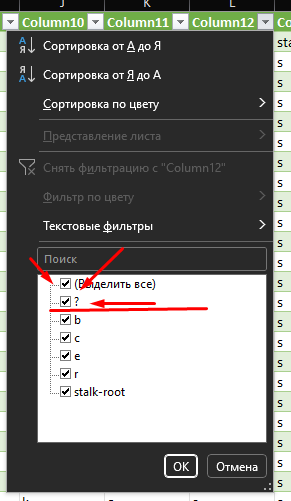  

### 3. Построение моделей
- построить модель логистической регрессии
- построить дерево решений
- сравнить полученные результаты  
- на основе дерева решений показать класс/классы, оказывающие наибольшее влияние на модель. Объясните возникшие закономерности.

In [4]:
features = data.drop(['class'], axis=1)
target = data['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Логистическая регрессия:")
print("Точность:", accuracy_score(y_test, y_pred_lr))
print("\nДерево решений:")
print("Точность:", accuracy_score(y_test, y_pred_dt))

importance = dt_model.feature_importances_
feature_names = features.columns.tolist()

feature_importance_dict = dict(zip(features.columns, importance))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nСамые важные признаки (в порядке убывания важности):")
for feature, importance in sorted_features[:8]:
    print(f"{feature}: {importance:.4f}")


Логистическая регрессия:
Точность: 0.9883076923076923

Дерево решений:
Точность: 1.0

Самые важные признаки (в порядке убывания важности):
odor: 0.9431
stalk-color-below-ring: 0.0237
stalk-surface-above-ring: 0.0120
spore-print-color: 0.0107
stalk-color-above-ring: 0.0042
population: 0.0042
gill-size: 0.0021
cap-shape: 0.0000


После выполнения этого блока кода мы можем увидеть следующее:
*   odor - является самым важным признаком, со значимостью 0.9... .
*   stalk-color-above-ring - второй по значимости признак.

Вывод:

Тут машинное обучение идеально показывает, что интуитивные признаки не всегда являются необходимыми для определения вида гриба, например, цвет гриба, форма шляпки и так далее не являются значительными в нашем датасете для прогнозирования.

Данная ситуация интересна, так как такие признаки как цвет шляпки считается,обычно, важными признаком для определения вида гриба( по крайней мере мне так кажется ), однако наша модель учитывает другие факторы.

Здесь мы можем выделить следующее:
*   В данном наборе "прямолинейные" факторы могут быть менее надежными признаками
*   Модель поняоа, что эти факторы не дают никакой дополнительной информации для прогнозирования
*   В этом датасете, такие признаки как цвет спор или запах более четко разделяют виды грибов


Также мы видим, то что точность DTR модели 1.0, что вызывает подозрения, но после посещения kaggle все подозрения отпали.







### 4. Ломай ломай мы же миллионеры ещё купим
- Скорее всего, у вас получились очень подозрительно хорошие результаты. Доведите свою модель <s>до истерики</s> до точности менее 0.9 на двух моделях одновременно, путём удаления наиболее влиятельных признаков.  
<i>P.S. Пожалуйста, сделайте что-то автоматическое, не нужно перебирать руками до победного.</i>  
<i>P.S.S. Не исключено, что в самый ответственный момент вас посетит некоторый Warning!!. Пожалуйста, обработайте его, согласно сути его ругательств.</i>

In [5]:
def remove_top_features(data, n_features_to_remove):
    features = data.drop(['class'], axis=1)
    dt_model = DecisionTreeClassifier()
    dt_model.fit(features, data['class'])
    importance = dt_model.feature_importances_

    sorted_features = sorted(zip(features.columns, importance), key=lambda x: x[1], reverse=True)

    removed_features = sorted_features[:n_features_to_remove]
    remaining_features = [feature for feature, _ in sorted_features if feature not in [f[0] for f in removed_features]]

    return data[remaining_features + ['class']]

features_to_remove = remove_top_features(data, n_features_to_remove=20)

X_train_removed, X_test_removed, y_train_removed, y_test_removed = train_test_split(
    features_to_remove.drop(['class'], axis=1),
    features_to_remove['class'],
    test_size=0.2,
    random_state=42
)

scaler_removed = StandardScaler()
X_train_scaled_removed = scaler_removed.fit_transform(X_train_removed)
X_test_scaled_removed = scaler_removed.transform(X_test_removed)

lr_model_removed = LogisticRegression(max_iter=1000)
lr_model_removed.fit(X_train_scaled_removed, y_train_removed)
y_pred_lr_removed = lr_model_removed.predict(X_test_scaled_removed)

dt_model_removed = DecisionTreeClassifier()
dt_model_removed.fit(X_train_scaled_removed, y_train_removed)
y_pred_dt_removed = dt_model_removed.predict(X_test_scaled_removed)

print("\nЛогистическая регрессия после удаления признаков:")
print("Точность:", accuracy_score(y_test_removed, y_pred_lr_removed))
print("\nДерево решений после удаления признаков:")
print("Точность:", accuracy_score(y_test_removed, y_pred_dt_removed))



Логистическая регрессия после удаления признаков:
Точность: 0.4393846153846154

Дерево решений после удаления признаков:
Точность: 0.7132307692307692


### 5. Посещаем модель с ответным визитом
- Сконфигурируйте датафрейм из фичей таким образом, чтобы:
    1) В нём было как можно меньше атрибутов;  
    2) Точность на обоих моделях была выше чем 0.99;
    3) Объясните, почему так произошло, что на деле нам вовсе и не нужны все 22 атрибута (или нужны...).  
<i>Вполне возможно, что выводы из пункта 3 вам очень пригодятся.</i>

In [6]:
columns_to_remove = ['population', 'veil-color', 'veil-type', 'cap-color', 'cap-shape', 'gill-attachment', 'habitat', 'stalk-root']
data_filtered = df.drop(columns=columns_to_remove)
features = data_filtered.drop(['class'], axis=1)
target = data_filtered['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Логистическая регрессия:")
print("Точность:", accuracy_score(y_test, y_pred_lr))
print("\nДерево решений:")
print("Точность:", accuracy_score(y_test, y_pred_dt))

print(data_filtered.info())

importance = dt_model.feature_importances_
feature_names = features.columns.tolist()

feature_importance_dict = dict(zip(features.columns, importance))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nСамые важные признаки (в порядке убывания важности):")
for feature, importance in sorted_features[:8]:
    print(f"{feature}: {importance:.4f}")

Логистическая регрессия:
Точность: 0.992

Дерево решений:
Точность: 1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   bruises                   8124 non-null   int64
 3   odor                      8124 non-null   int64
 4   gill-spacing              8124 non-null   int64
 5   gill-size                 8124 non-null   int64
 6   gill-color                8124 non-null   int64
 7   stalk-shape               8124 non-null   int64
 8   stalk-surface-above-ring  8124 non-null   int64
 9   stalk-surface-below-ring  8124 non-null   int64
 10  stalk-color-above-ring    8124 non-null   int64
 11  stalk-color-below-ring    8124 non-null   int64
 12  ring-number               8124 non-null   int64
 13  ring-type            

Вывод:

Удалить абсолютно все атрибуты помимо самых важных нельзя, модель не улучшит свои показатели , по крайней мере в данном датасете, так как при удалении некоторых атрибутов может происходить изменение баланса между атрибутами, увеличение простоты модели и открытие новых взаимосвязей.

Отмечу что этот эффект может быть специфичен для конкретного набора данных(или только для нашего) и модели. Не всегда удаляя атрибуты, мы получаем лучшую модель, но иногда это действительно происходит благодаря открытию новых важных взаимосвязей в данных.

Ну по крайней мере у меня получилось так, возможно все бы изменилось, если бы как-то по-другому кодировал данные.

### 6. Визуализация
- Отобразите на графиках попарно зависимость пар атрибутов (как минимум, ключевые из п.5). Попробуйте выделить такие пары, где наглядно можно разделить исходные данные по классам вашего таргета.

  Использовать можно matplotlib/seaborn.

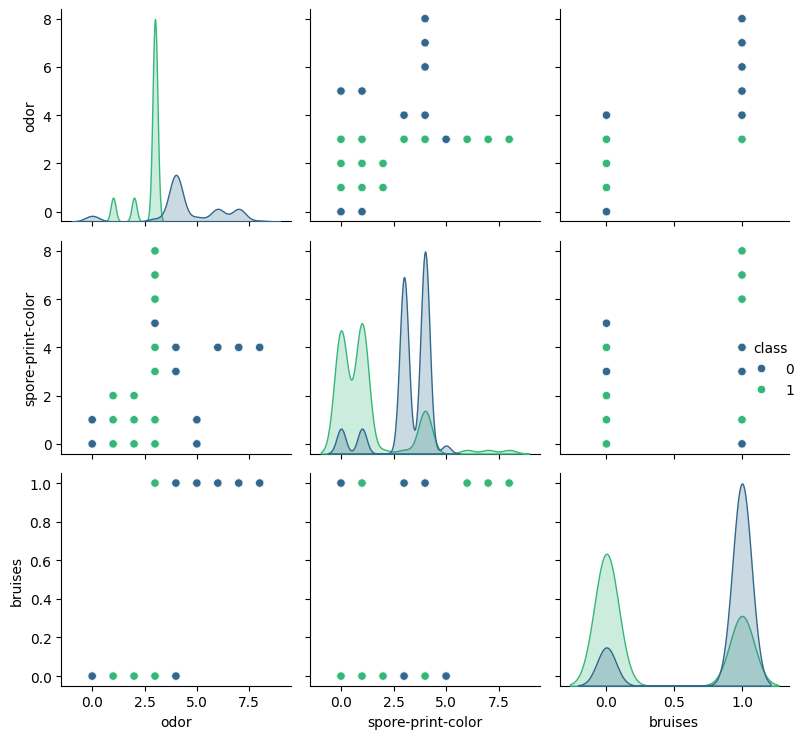

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ['odor','spore-print-color', 'bruises']

g = sns.pairplot(data, vars=key_features, hue='class', palette='viridis')


plt.tight_layout()
plt.show()


Три пары:

*   odor vs spore-print-color
*   spore-print-color vs bruises
*   bruises vs odor

Каждая точка на графике окрашена в соответствии с ее классом ( видно в легенде  ) : p = 0 , e = 1

В верхнем правом углу каждого подграфика показан корреляционный коэффициент между двумя признаками

На каждом графике показаны вершины диагоналей, представляющие средние значения признаков для каждого класса

### 7. Вывод
- Сделайте вывод о:
   - проделанной работе
   - семинарах в целом
   - дисциплине
   - жизни

**Вывод:**

Задание по классификации грибов включало все ключевые этапы работы с данными, от предварительной оценки до построения и анализа моделей. Особенно ценными были требования к тщательному изучению датасета, обработке данных и поиску оптимального набора признаков для моделирования.

Особенно понравилось задание "ломать ломая" где был использован подход с использованием автоматического метода удаления признаков.

**Насчет семинаров:**

Семинаров было очень мало, и в это короткое время мы изучили базовый ML, что не может не радовать. Поработали с разными датасетами, посмотрели, как работать/чистить данные в этих датасетах, столкнулись с аномалиями в датасетах, очистка выбросов, а также обучение моделей для прогнозирования.

**Дисциплина:**

Дисциплина только набирает обороты, так как впереди еще лабораторные работы и куча лекций) Надеюсь самое "вкусное" оставлено напоследок. А в общем очень интересная и полезная дисциплина, даже для тех, кому не было дело до ML (мне). Но благодаря дисциплине я потрогал ML и изучил многие концепты.
